In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import pandas as pd

### Ejercicio 1: distribución de la media de números aleatorios

1. Escribir un programa que permite generar una matriz de dimension $N\times N$ cuyos elementos sean números enteros aleatorios entre 0 y 100.  
   Generar una de esas matrices para el caso N=20.
   
   [Ayuda: la función, randrange(a,b) del paquete random permite generar un número aleatorio entero entre los números a y b].

In [14]:
def matrix(N):
    """Creates NxN matrix with random numbers between 0 and 100.

    Args:
        N (int): matrix dimension.
    """
    assert type(N) == int and N > 0
    result = np.zeros([N, N])
    for i in range(0, N):
        for j in range(0, N):
            result[i, j] = rd.randrange(0, 101)
    return result

A = matrix(10)
print(A)

[[38. 68. 95. 44. 69. 35. 56. 38. 29.  0.]
 [86. 39. 54. 24. 30. 57. 43. 16. 16. 77.]
 [37.  8. 91. 29. 30. 29. 61.  5. 39. 94.]
 [99.  3. 49. 53. 97. 97. 35. 11. 20. 47.]
 [ 4.  0. 26. 67. 63. 13. 72. 89. 24. 37.]
 [82. 15. 95. 14. 41. 66. 37. 10. 68. 63.]
 [40. 52. 62. 37. 93. 71. 23. 40. 22. 96.]
 [68. 41. 17. 67. 50. 34. 76. 54. 41. 36.]
 [13. 10. 34. 64. 66. 81. 27. 37. 12. 42.]
 [25.  4. 59.  4. 88. 10. 77.  7. 29. 33.]]


2. Escribir un programa tal que, dada una matriz aleatoria de dimensión $N$ , encuentre la secuencia de $0 < n < N$ números consecutivos pertenecientes a una fila, columna o diagonal (tanto inferior como superior) de la matriz con mayor media.   
   Prestar atención a que el programa sea óptimo desde el punto de vista computacional.

   Almacenar tanto el valor de la media máxima, como la secuencia que la proporciona (por ejemplo, primer elemento de la secuencia, y si ésta corresponde a una fila, una columna o una diagonal).

   Calcular la media máxima, para una matriz de dimensión 20 y una secuencia de 4 números consecutivos.

In [ ]:
def search_consecutive(matrix, n, printing = False, contour_conditions = True):
    """Locates the highest-mean sequence of n consecutive numbers in a matrix.

    Args:
        matrix (np.array): array to look for sequences in.
        n (int): length of the desired sequence
        printing (bool, optional): determines wheter to print a sentence with all the information. Defaults to False.
        contour_conditions (bool, optional): determines wheter periodic contour contitions are to be considered while searching the array.
                                            Defaults to True.

    Returns:
        tuple: contains (in order): the highest average of n consecutive numbers, the sequence, the location in the array as (row, column) and
                a string telling if the sequence is in a row, column or diagonal.
    """

    dim = np.shape(matrix)
    
    def loc_element(i, N):
        """Locates element in a list and returns the corresponfing matrix coordinates for that element.

        Args:
            i (int): element index in list
            N (int): matrix dimension

        Returns:
            int: row and column of the element if the list was a matrix of NxN
        """
        if i < N:
            row, column = 0, i
        else:
            row, column = i//N, i%N
        return row, column

    ## Search rows:
    best_mean_row = 0

    if not contour_conditions:
        matrix_elements_rows = [float(matrix[i, j]) for i in range(dim[0]) for j in range(dim[1])]
        for i in range(len(matrix_elements_rows) - n):
            sequence = matrix_elements_rows[i:i+n]
            mean = np.average(sequence)
            if mean > best_mean_row:
                best_mean_row = mean
                best_mean_row_loc = (best_mean_row, sequence, (loc_element(i, dim[0])[0], loc_element(i, dim[0])[1]), 'Row')
    else:
        for i in range(0, np.shape(matrix)[0]):
            for j in range(0, np.shape(matrix)[1]-n):
                sequence = matrix[i, j:j+n]
                mean = np.average(sequence)
                if mean > best_mean_row:
                    best_mean_row = mean
                    best_mean_row_loc = (best_mean_row, sequence, (i, j), 'Row')


    ## Search columns:
    T = np.transpose(matrix)
    best_mean_col = 0

    if not contour_conditions:
        matrix_elements_cols = [float(T[i, j]) for i in range(dim[0]) for j in range(dim[1])]
        for i in range(len(matrix_elements_cols) - n):
            sequence = matrix_elements_cols[i:i+n]
            mean = np.average(sequence)
            if mean > best_mean_col:
                best_mean_col = mean
                best_mean_col_loc = (best_mean_col, sequence, (loc_element(i, dim[0])[1], loc_element(i, dim[0])[0]), 'Column')
    else:
        for i in range(0, dim[0]):
            for j in range(0, dim[1]-n):
                sequence = matrix[i, j:j+n]
                mean = np.average(sequence)
                if mean > best_mean_col:
                    best_mean_col = mean
                    best_mean_col_loc = (best_mean_col, sequence, (i, j), 'Column')


    ## Search diagonals:
    main_diag = []
    for i in range(dim[0]):
        for j in range(dim[1]):
            if i == j:
                main_diag.append(float(matrix[i, j]))
    best_mean_mdiag = 0
    for k in range(len(np.array(main_diag)) - 4):
        sequence = main_diag[k:k+n]
        mean = np.average(sequence)
        if mean > best_mean_mdiag:
            best_mean_mdiag = mean
            best_mean_mdiag_loc = (best_mean_mdiag, sequence, (i, j), 'Main Diagonal')

    sec_diag = []
    for i in range(dim[0]):
        for j in range(dim[1]):
            if i == j:
                sec_diag.append(float(matrix[i, j]))
    best_mean_sdiag = 0
    for k in range(len(np.array(sec_diag)) - 4):
        sequence = sec_diag[k:k+n]
        mean = np.average(sequence)
        if mean > best_mean_sdiag:
            best_mean_sdiag = mean
            best_mean_sdiag_loc = (best_mean_sdiag, sequence, (i, j), 'Secondary Diagonal')
    
    results = [best_mean_row_loc, best_mean_col_loc, best_mean_mdiag_loc, best_mean_sdiag_loc]
    result = max(results, key = lambda t: t[0])

    if printing == True:
        print(f"The sequence of {n} numbers with the highest mean ({result[0]}) is {result[1]} is located at {result[2]} ({result[3]}) ")

    return result

In [28]:
A = matrix(20)

test = search_consecutive(A, 4, printing=True)

The sequence of 4 numbers with the highest mean (88.5) is [90. 86. 95. 83.] is located at (13, 1) (Row) 


   
3. Escribir un programa que represente el histograma de los valores medios máximos de las secuencias de $n$ números consecutivos obtenidos al generar $M$ matrices aleatoria de dimensión $N$.

   Representar el histograma para 10000 matrices de dimensión 20 y secuencias de 4 números.  
   ¿Qué tipo de distribución sigue la media máxima de dichas secuencias?.
   
   


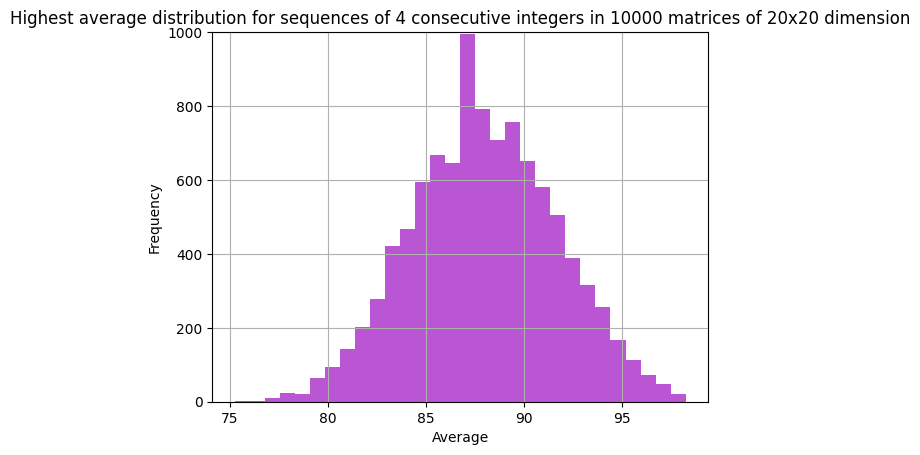

In [45]:
def matrix_histogram(n, M, N, hist = False):
    averages = [float(search_consecutive(matrix(N), n)[0]) for _ in range(M)]
    if hist:
        plt.figure()
        plt.hist(averages, bins = 30, color = 'mediumorchid')
        plt.xlabel('Average')
        plt.ylabel('Frequency')
        plt.title(f'Highest average distribution for sequences of {n} consecutive integers in {M} matrices of {N}x{N} dimension')
        plt.grid()
        plt.ylim(0, 1000)
        plt.show()
    return averages

result = matrix_histogram(4, 10000, 20, hist = True)

   
4. Estudiar como evoluciona la distribución y la media cuando para una dimensión fija, se aumenta el número de elementos de la secuencia.   
   Por ejemplo para N=20, y $n=4,\,6,\,8,\,10,\,12$.   
   Explicar los resultados obtenidos.
   
   


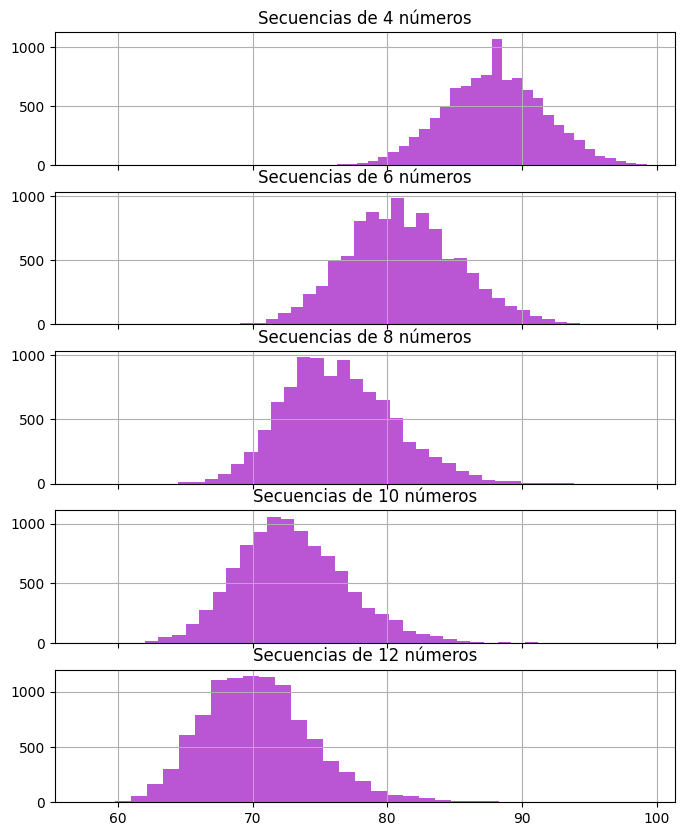

In [49]:
fig, axs = plt.subplots(5, 1, figsize = (8, 10), sharex = True)
n = 4
for i, ax in enumerate(axs):
    averages = [float(search_consecutive(matrix(20), n)[0]) for _ in range(10000)]
    ax.hist(averages, bins = 30, color = 'mediumorchid')
    ax.grid()
    ax.set_title(f"Secuencias de {n} números")
    n += 2

   
5. Considerar ahora condiciones periódicas para las secuencias de números consecutivos, es decir, que el elemento $A[N + i, j]= A[i, j]$ y lo mismo para las columnas. 
   Volver a representar los mismos histogramas, compararlos con los de condiciones de contorno fijas y explicar los resultados obtenidos.


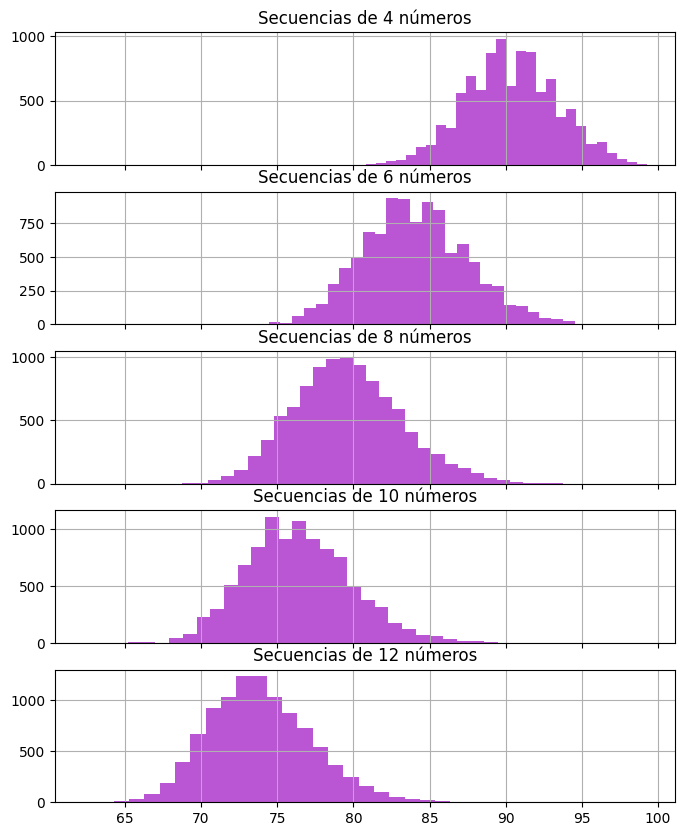

In [256]:
fig, axs = plt.subplots(5, 1, figsize = (8, 10), sharex = True)
n = 4
for i, ax in enumerate(axs):
    averages = [float(search_consecutive(matrix(20), n, contour_conditions=False)[0]) for _ in range(10000)]
    ax.hist(averages, bins = 30, color = 'mediumorchid')
    ax.grid()
    ax.set_title(f"Secuencias de {n} números")
    n += 2

**Ayuda:**

 * Una elección razonable para el número de bins (cajas) es 30, mientras que el rango del histograma (intervalo en el que se representa) puede fijarse entre 60 y 100.


* Empezar estudiando que vuestro programa funciona para valores pequeños de $M$.  
  Si vuestro programa tarda más de unos pocos segundos en ejecutarse reducir el valor de $M$, por ejemplo a 1000 o incluso a 100.


* En python el slicing te permite seleccionar una secuencia de números o una submatriz.   
  En la sintaxis $A[i : j : a]$, $a$ corresponde al paso del slicing.